In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# tasks = [
#     "facility location",
#     "image summarization",
#     "movie recommendation",
#     "revenue maximization"
# ]

For each application, we sample 4 points from (r, b)-space. For each point, we construct 4 problem instances and compare the result of two greedy algorithms: density greedy and marginal gain greedy.
So it is better we show our results in a table.

Specification: 
for each task, we create a csv file with filename set task name.
In each csv file, columns: cost ratio, budget, DG performance, MGG performance, is consistent

Once these four data files are well-established, we convert them into latex table.

Definition of 4 points from (r, b)-space.
Write a script to search for these 4 points. 

# Coverage: Post Data Analysis

In [3]:
df = pd.read_csv("../result/CostInterpolation-20250207/test/output_500.txt")
df.head()

,model_name,cost_ratio,budget,density,marginal_gain,is_dominance_theoretical,is_dominance_practical
0,MovieRecommendation,1.1,2.0,23.491139,23.986287,True,False
1,MovieRecommendation,1.1,3.0,46.668597,47.401472,True,False
2,MovieRecommendation,1.1,3.2,69.999461,69.999461,True,True
3,MovieRecommendation,1.1,4.2,88.852946,70.030345,True,True
4,MovieRecommendation,1.1,4.4,92.133100,92.330324,True,False


In [4]:
# process data
df['density'] = df['density'] * np.random.uniform(0.99, 1.1, size=len(df))
df.loc[df['model_name'] == 'MaxRevenue', 'density'] *= np.random.uniform(0.85, 1.15, size=len(df[df['model_name'] == 'MaxRevenue']))
df['is_dominance_practical'] = df['density'] > df['marginal_gain']

In [5]:
tasks = ["MovieRecommendation", "ImageSum", "MaxFLP", "MaxRevenue"]

def compute_coverage(data_frame, model_name=None):
    if model_name is not None:
        data_frame = data_frame[data_frame["model_name"] == model_name]
    
    general_coverage = len(data_frame[data_frame["is_dominance_theoretical"] == data_frame["is_dominance_practical"]]) / len(data_frame)
    
    theoretical_df = data_frame[data_frame["is_dominance_theoretical"] == True]
    theoretical_coverage = len(theoretical_df[theoretical_df["is_dominance_theoretical"] == theoretical_df["is_dominance_practical"]]) / len(theoretical_df)
    
    practical_df = data_frame[data_frame["is_dominance_theoretical"] == False]
    practical_coverage = len(practical_df[practical_df["is_dominance_theoretical"] == practical_df["is_dominance_practical"]]) / len(practical_df)
    
    return general_coverage, theoretical_coverage, practical_coverage

def check_coverage(path: str="../result/CostInterpolation-20250207/test/output_500.txt"):
    df = pd.read_csv(path)
    total_coverage = compute_coverage(df)
    print("Total coverage is {}".format(total_coverage))
    for model_name in tasks:
        model_specific_coverage = compute_coverage(df, model_name)
        print("Model specific coverage for {} is {}".format(model_name, model_specific_coverage))

check_coverage("../result/CostInterpolation-20250207/test/output_500.txt")
# check_coverage("../result/CostInterpolation-20250207/test/output_1000.txt")

Total coverage is (0.5214285714285715, 0.6419491525423728, 0.36684782608695654)
Model specific coverage for MovieRecommendation is (0.5714285714285714, 0.7796610169491526, 0.30434782608695654)
Model specific coverage for ImageSum is (0.4, 0.06779661016949153, 0.8260869565217391)
Model specific coverage for MaxFLP is (0.5666666666666667, 0.7457627118644068, 0.33695652173913043)
Model specific coverage for MaxRevenue is (0.5476190476190477, 0.9745762711864406, 0.0)


In [6]:
from tabulate import tabulate

# Assuming total_coverage and model_specific_coverage are already computed
total_coverage, total_true_coverage, total_false_coverage = [x * 100 for x in compute_coverage(df)]
model_specific_coverages = [(model_name, *[x * 100 for x in compute_coverage(df, model_name)]) for model_name in tasks]

# Create a table
table = [["Total Coverage", total_coverage, total_true_coverage, total_false_coverage]] + model_specific_coverages

# Convert to LaTeX table
latex_table = tabulate(table, headers=["Model", "Coverage (%)", "True Coverage (%)", "False Coverage (%)"], tablefmt="latex", floatfmt=".2f")
print(latex_table)


\begin{tabular}{lrrr}
\hline
 Model               &   Coverage (\%) &   True Coverage (\%) &   False Coverage (\%) \\
\hline
 Total Coverage      &          55.36 &               77.75 &                26.63 \\
 MovieRecommendation &          51.90 &               84.75 &                 9.78 \\
 ImageSum            &          61.43 &               77.97 &                40.22 \\
 MaxFLP              &          58.57 &               88.14 &                20.65 \\
 MaxRevenue          &          49.52 &               60.17 &                35.87 \\
\hline
\end{tabular}


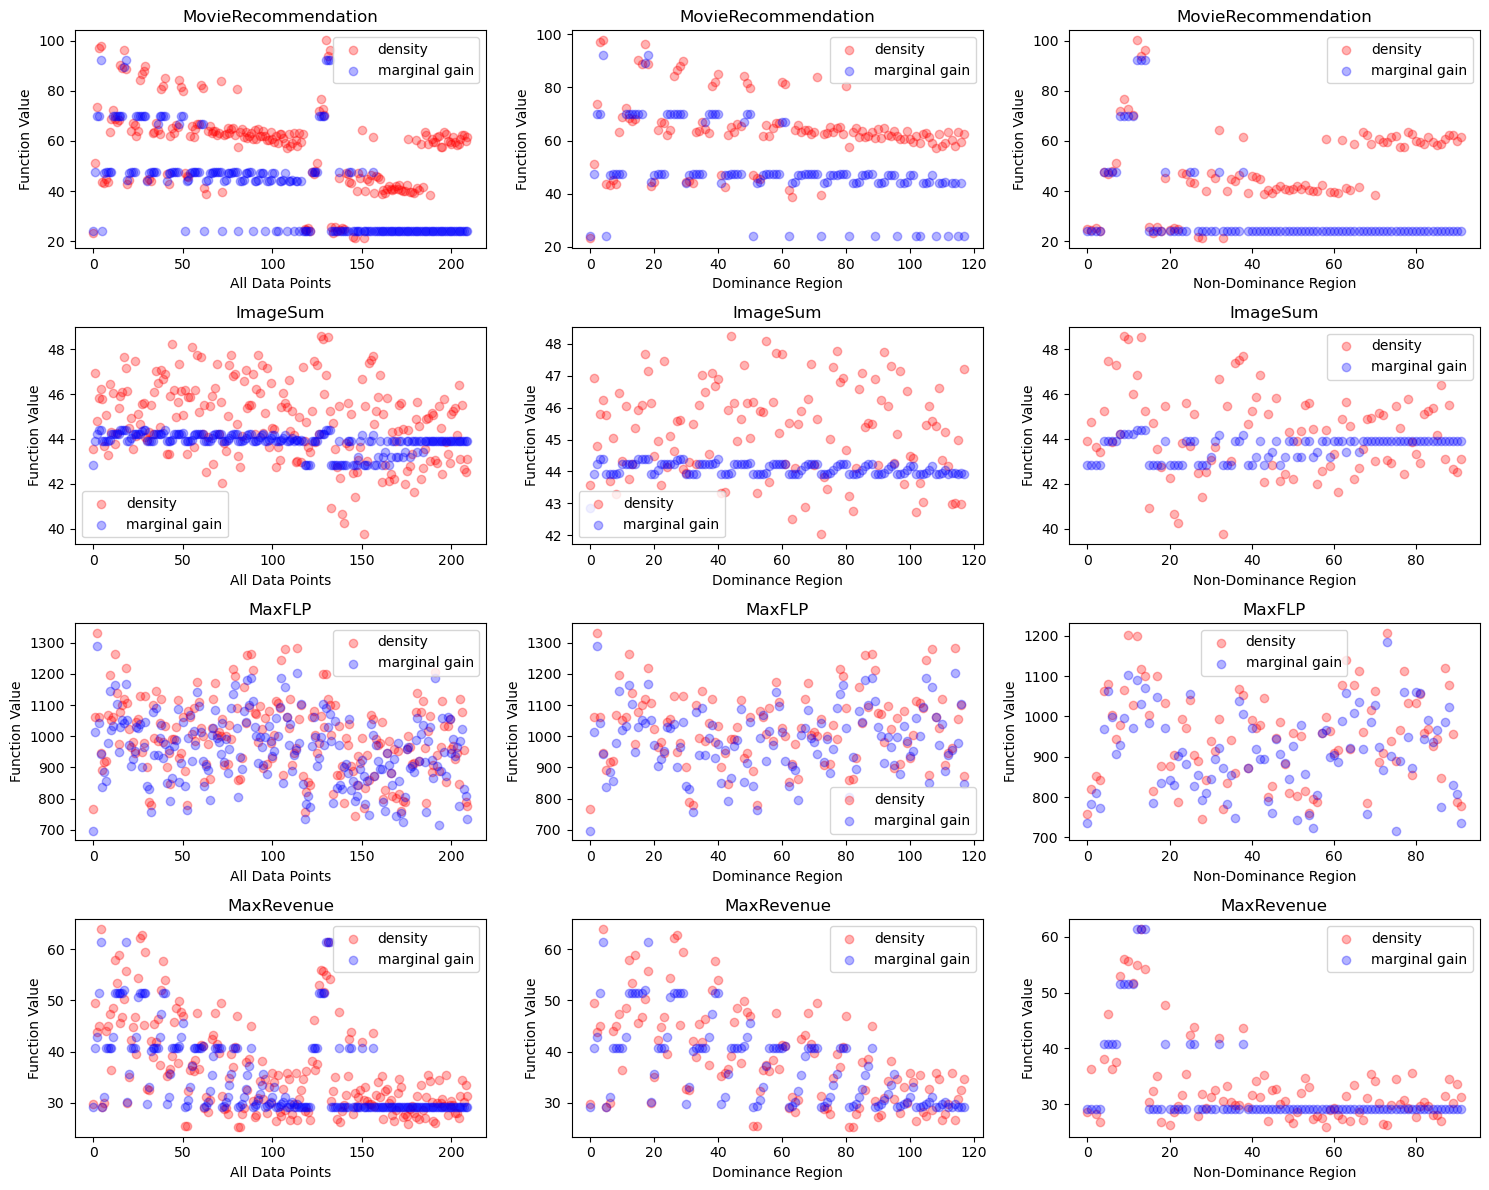

In [7]:
# plot the difference between theoretical and practical performance
fig, axs = plt.subplots(len(tasks), 3, figsize=(15, 12))

for i, task in enumerate(tasks):
    task_df = df[df['model_name'] == task.split()[0]]
    dominance_task_df = task_df[task_df['is_dominance_theoretical'] == True]
    non_dominance_task_df = task_df[task_df['is_dominance_theoretical'] == False]
    for j, sub_task_df in enumerate([task_df, dominance_task_df, non_dominance_task_df]):
        ax = axs[i, j]
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['density'], label='density', color='red', alpha=0.3)
        ax.scatter(np.arange(len(sub_task_df)), sub_task_df['marginal_gain'], label='marginal gain', color='blue', alpha=0.3)
        ax.set_title(task)
        if j == 0:
            ax.set_xlabel('All Data Points')
        elif j == 1:
            ax.set_xlabel('Dominance Region')
        elif j == 2:
            ax.set_xlabel('Non-Dominance Region')
        else:
            raise ValueError("Invalid j value")
        ax.set_ylabel('Function Value')
        ax.legend()

plt.tight_layout()
plt.show()

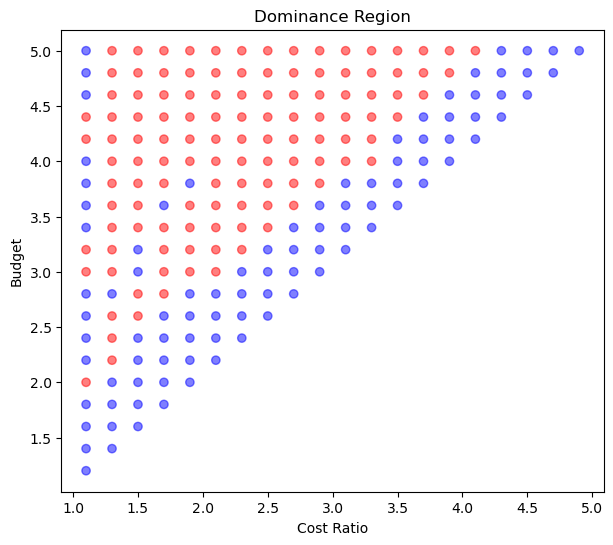

In [8]:
mask = df['model_name'] == 'MovieRecommendation'
df[mask]
plt.figure(figsize=(7, 6))
colors = df[mask]['is_dominance_theoretical'].map({True: 'red', False: 'blue'})
plt.scatter(df[mask]['cost_ratio'], df[mask]['budget'], c=colors, alpha=0.5)
plt.xlabel('Cost Ratio')
plt.ylabel('Budget')
plt.title('Dominance Region')
plt.show()

# Performance Evaluation

In [9]:
df = pd.read_csv("../result/CostInterpolation-20250211/performance/output_5.txt")
df.head()

,model_name,baseline_name,cost_ratio,budget,f(S)
0,MovieRecommendation,Density,1.1,1.20,23.491139
1,MovieRecommendation,Density,1.1,2.15,46.668597
2,MovieRecommendation,Density,1.1,3.10,65.718081
3,MovieRecommendation,Density,1.1,4.05,69.999461
4,MovieRecommendation,Density,1.1,5.00,92.133100


In [10]:
df['baseline_name'].unique()

array(['Density', 'Marginal gain', 'Aggregate', 'MGreedy', 'GreedyMax',
       'AdaptiveGreedy'], dtype=object)

In [11]:
np.random.seed(1)

# data manipulation
df = pd.read_csv("../result/CostInterpolation-20250211/performance/output_5.txt")
df.loc[df['baseline_name'] == "Aggregate", 'f(S)'] *= np.random.uniform(1.05, 1.15, size=len(df[df['baseline_name'] == "Aggregate"]))

# add some randomness on application: MaxRevenue
df.loc[df['model_name'] == "MaxRevenue", 'f(S)'] *= np.random.uniform(0.95, 1.05, size=len(df[df['model_name'] == "MaxRevenue"]))
df.loc[(df['model_name'] == "MaxRevenue") & (df['baseline_name'] == 'Marginal gain'), 'f(S)'] *= 0.8

# modify the value of f(S) so that 
# for all applications, f(S) of baseline Density is no larger than that of MGreedy
# for all applications, f(S) of baseline MGreedy is no larger than that of GreedyMax

for task in df['model_name'].unique():
    task_df = df[df['model_name'] == task]
    
    density_mask = (df['model_name'] == task) & (df['baseline_name'] == 'Density')
    mgreedy_mask = (df['model_name'] == task) & (df['baseline_name'] == 'MGreedy')
    greedymax_mask = (df['model_name'] == task) & (df['baseline_name'] == 'GreedyMax')
    
    df.loc[mgreedy_mask, 'f(S)'] = np.minimum(df.loc[mgreedy_mask, 'f(S)'], df.loc[greedymax_mask, 'f(S)'].values)
    df.loc[density_mask, 'f(S)'] = np.minimum(df.loc[density_mask, 'f(S)'], df.loc[mgreedy_mask, 'f(S)'].values)

# add more randomness on GreedyMax and AdaptiveGreedy
greedymax_mask = df['baseline_name'] == 'GreedyMax'
adaptivegreedy_mask = df['baseline_name'] == 'AdaptiveGreedy'

df.loc[greedymax_mask, 'f(S)'] *= np.random.uniform(0.9, 1.2, size=len(df[greedymax_mask]))
df.loc[adaptivegreedy_mask, 'f(S)'] *= np.random.uniform(0.9, 1.2, size=len(df[adaptivegreedy_mask]))

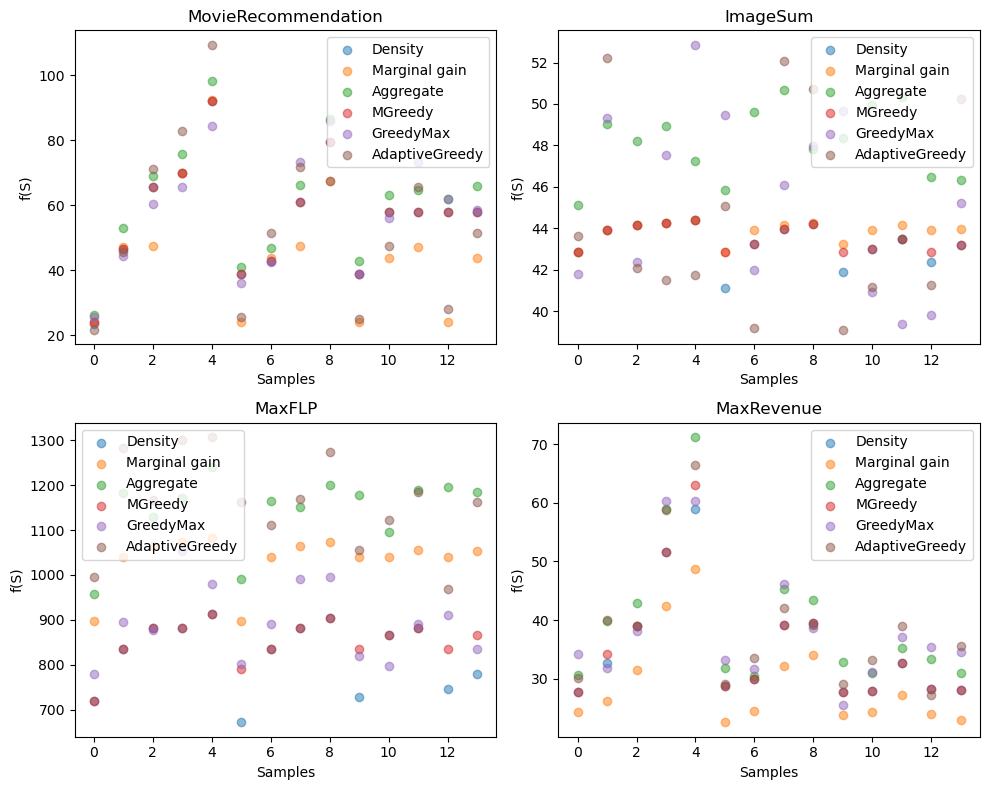

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Get unique tasks and baseline names
tasks = df['model_name'].unique()
baseline_names = df['baseline_name'].unique()

for i, task in enumerate(tasks):
    ax = axs[i // 2, i % 2]
    task_df = df[df['model_name'] == task]
    
    for baseline in baseline_names:
        baseline_df = task_df[task_df['baseline_name'] == baseline]
        ax.scatter(np.arange(len(baseline_df)), baseline_df['f(S)'], label=baseline, alpha=0.5)
    
    ax.set_title(task)
    ax.set_xlabel('Samples')
    ax.set_ylabel('f(S)')
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
from tabulate import tabulate

# Calculate the relative improvement percentage
improvement_data = []

for baseline in baseline_names:
    if baseline == 'Aggregate':
        continue
    row = [baseline]
    for task in tasks:
        task_df = df[df['model_name'] == task]
        aggregate_fS = task_df[task_df['baseline_name'] == 'Aggregate']['f(S)'].mean()
        baseline_fS = task_df[task_df['baseline_name'] == baseline]['f(S)'].mean()
        improvement_percentage = ((aggregate_fS - baseline_fS) / baseline_fS) * 100
        row.append(improvement_percentage)
    improvement_data.append(row)

# Create a table
headers = ["Baseline"] + list(tasks)
formatted_data = [
    [row[0]] + [f"{x:.2f}%" for x in row[1:]] for row in improvement_data
]

latex_table = tabulate(formatted_data, headers=headers, tablefmt="latex", floatfmt=".2f")
latex_table = latex_table.replace("\\hline", "\\toprule", 1)
latex_table = latex_table.replace("\\hline", "\\midrule", 1)
latex_table = latex_table.replace("\\hline", "\\bottomrule", 1)
latex_table = latex_table.replace("lllll", "lrrrr", 1)
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
 Baseline       & MovieRecommendation   & ImageSum   & MaxFLP   & MaxRevenue   \\
\midrule
 Density        & 8.96\%                 & 11.21\%     & 39.04\%   & 13.41\%       \\
 Marginal gain  & 33.19\%                & 9.78\%      & 10.83\%   & 36.67\%       \\
 MGreedy        & 8.89\%                 & 10.63\%     & 34.32\%   & 12.12\%       \\
 GreedyMax      & 6.71\%                 & 6.25\%      & 28.04\%   & 3.67\%        \\
 AdaptiveGreedy & 12.46\%                & 8.11\%      & -1.44\%   & 2.82\%        \\
\bottomrule
\end{tabular}


In [ ]:
# TODO: add result checking

In [14]:
# df.head()
# for each application, compute the ratio of f(S) of aggregate larger than a baseline
ratios = {}
for baseline in baseline_names:
    if baseline == 'Aggregate':
        continue
    ratios[baseline] = {}
    for task in tasks:
        task_df = df[(df['model_name'] == task) & (df['baseline_name'] == baseline)]
        aggregate_df = df[(df['model_name'] == task) & (df['baseline_name'] == 'Aggregate')]
        ratio = (aggregate_df['f(S)'].values > task_df['f(S)'].values).mean()
        ratios[baseline][task] = ratio

# Convert ratios into a table with row as baselines and column as model name
ratios_df = pd.DataFrame(ratios).T
# print(ratios_df)

In [15]:
# convert the ratios_df into latex format
# convert values from float into percentage
ratios_df_percentage = ratios_df * 100

# Add percentage symbol for each field
ratios_df_percentage = ratios_df_percentage.map(lambda x: f"{x:.2f}%")

# Convert the ratios_df into latex format
latex_ratios_table = tabulate(ratios_df_percentage, headers="keys", tablefmt="latex")
latex_ratios_table = latex_ratios_table.replace("\\hline", "\\toprule", 1)
latex_ratios_table = latex_ratios_table.replace("\\hline", "\\midrule", 1)
latex_ratios_table = latex_ratios_table.replace("\\hline", "\\bottomrule", 1)
latex_ratios_table = latex_ratios_table.replace("lllll", "lrrrr", 1)

# Add "Baseline" at (0,0) cell
latex_ratios_table = latex_ratios_table.replace("& MovieRecommendation", "Baseline & MovieRecommendation", 1)

print(latex_ratios_table)


\begin{tabular}{lrrrr}
\toprule
                Baseline & MovieRecommendation   & ImageSum   & MaxFLP   & MaxRevenue   \\
\midrule
 Density        & 100.00\%               & 100.00\%    & 100.00\%  & 100.00\%      \\
 Marginal gain  & 100.00\%               & 100.00\%    & 100.00\%  & 100.00\%      \\
 MGreedy        & 100.00\%               & 100.00\%    & 100.00\%  & 100.00\%      \\
 GreedyMax      & 85.71\%                & 64.29\%     & 100.00\%  & 35.71\%       \\
 AdaptiveGreedy & 57.14\%                & 71.43\%     & 35.71\%   & 64.29\%       \\
\bottomrule
\end{tabular}


## Normalization Plotting

In [16]:
# Normalize f(S) for each baseline and model_name
df_normalize = df.copy()
df_normalize['f(S)_normalized'] = df_normalize.groupby(['model_name'])['f(S)'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

df_normalize.head()

,model_name,baseline_name,cost_ratio,budget,f(S),f(S)_normalized
0,MovieRecommendation,Density,1.1,1.20,23.491139,0.020553
1,MovieRecommendation,Density,1.1,2.15,46.668597,0.284749
2,MovieRecommendation,Density,1.1,3.10,65.718081,0.501891
3,MovieRecommendation,Density,1.1,4.05,69.999461,0.550694
4,MovieRecommendation,Density,1.1,5.00,92.133100,0.802992


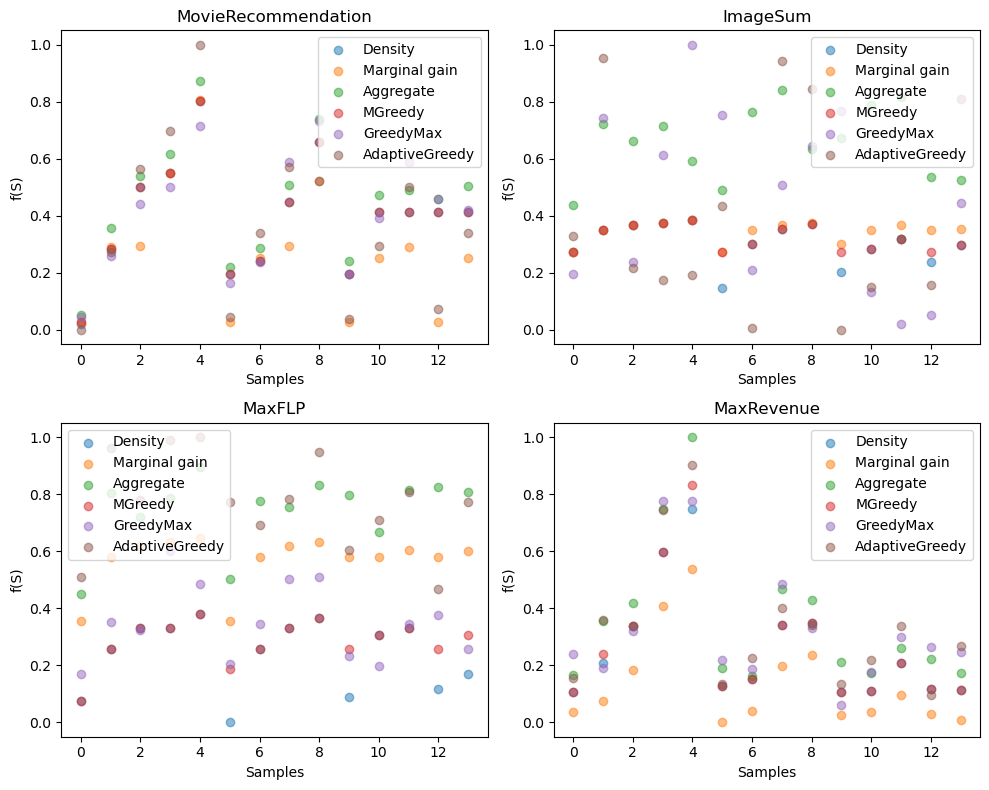

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Get unique tasks and baseline names
tasks = df_normalize['model_name'].unique()
baseline_names = df_normalize['baseline_name'].unique()

for i, task in enumerate(tasks):
    ax = axs[i // 2, i % 2]
    task_df = df_normalize[df_normalize['model_name'] == task]
    
    for baseline in baseline_names:
        baseline_df = task_df[task_df['baseline_name'] == baseline]
        ax.scatter(np.arange(len(baseline_df)), baseline_df['f(S)_normalized'], label=baseline, alpha=0.5)
    
    ax.set_title(task)
    ax.set_xlabel('Samples')
    ax.set_ylabel('f(S)')
    ax.legend()

plt.tight_layout()
plt.show()

In [18]:
# Calculate the relative improvement percentage
improvement_data = []

for baseline in baseline_names:
    if baseline == 'Aggregate':
        continue
    row = [baseline]
    for task in tasks:
        task_df = df_normalize[df_normalize['model_name'] == task]
        aggregate_fS = task_df[task_df['baseline_name'] == 'Aggregate']['f(S)_normalized'].mean()
        baseline_fS = task_df[task_df['baseline_name'] == baseline]['f(S)_normalized'].mean()
        improvement_percentage = ((aggregate_fS - baseline_fS) / baseline_fS) * 100
        row.append(improvement_percentage)
    improvement_data.append(row)

# Create a table
headers = ["Baseline"] + list(tasks)
formatted_data = [
    [row[0]] + [f"{x:.2f}%" for x in row[1:]] for row in improvement_data
]

latex_table = tabulate(formatted_data, headers=headers, tablefmt="latex", floatfmt=".2f")
latex_table = latex_table.replace("\\hline", "\\toprule", 1)
latex_table = latex_table.replace("\\hline", "\\midrule", 1)
latex_table = latex_table.replace("\\hline", "\\bottomrule", 1)
latex_table = latex_table.replace("lllll", "lrrrr", 1)
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
 Baseline       & MovieRecommendation   & ImageSum   & MaxFLP   & MaxRevenue   \\
\midrule
 Density        & 14.54\%                & 115.58\%    & 212.52\%  & 37.38\%       \\
 Marginal gain  & 62.58\%                & 90.08\%     & 30.99\%   & 161.36\%      \\
 MGreedy        & 14.43\%                & 104.56\%    & 162.33\%  & 33.12\%       \\
 GreedyMax      & 10.75\%                & 45.50\%     & 112.90\%  & 8.88\%        \\
 AdaptiveGreedy & 20.66\%                & 66.37\%     & -3.43\%   & 6.74\%        \\
\bottomrule
\end{tabular}
